In [1]:
# Import other modules not related to PySpark
import os
import sys 
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline 

### general exploration  

In [2]:
df_group = pd.read_csv('Groupes.csv' , delimiter=";" , header=0 )
df_group.drop(columns=['Unnamed: 15'] , inplace=True)
# Show the DataFrame
df_group.head() 

GROUP_ID                     Groupe   Nom du responsable  Niveau du groupe  \
0         1                    AGI ABD  Villemain, Stephane                 2   
1         2             AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3               DAST AIN ESA     Kajdan, Stephane                 2   
3         4           OLD TEAM SYSTEME                  NaN                20   
4         5  OCO - EXPERTISE OFFICE365       Deleage, Marie                 2   

     Pays  Alerte Mail                                 Employee du groupe  \
0  France            1                                                NaN   
1  France            1                                                NaN   
2  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   
3  France            1  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...   
4  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   

  Type groupe            Profil manager          Date de fin Courriel  \
0         DBA             OPERATEUR DSI           24/04/2019      NaN   
1        DAST  OPERATEUR + GESTION PARC           12/09/2017      NaN   
2        DAST  OPERATEUR + GESTION PARC                  NaN      NaN   
3        DAST                       NaN  26/01/2024 16:07:56      NaN   
4       Train            ADMINISTRATEUR                  NaN      NaN   

       Train  E_IS_SHARED_SERVICE  \
0        NaN                  NaN   
1        NaN                  NaN   
2        NaN                  NaN   
3        NaN                  NaN   
4  Hyperloop                  NaN   

                                         Commentaire          GROUP_SP  
0  Archivage du groupe suite à la demande : S1904...         [AGI ABD]  
1                                                NaN  [AGI AIN BACKUP]  
2  Renommage du groupe "AGI AIN ESA" en "DAST AIN...     [AGI AIN ESA]  
3  Renommage du groupe "AGI AIN INFR" en "DAST AI...    [AGI AIN INFR]  
4  Renommage du groupe "AGI AIN MSG" en "DAST AIN...     [AGI AIN MSG]

In [4]:
df2 = pd.read_excel('Incident OT2_Complet (1).xlsx')
df2.columns 

Index(['Numéro ticket', 'Statut', 'Priorité', 'Date de création',
       'Date de création de l'action en cours',
       'Date de prise en charge de l'action en cours', 'Sujet',
       'Brève description', 'Objet de l'incident', 'Groupe', 'Type de groupe',
       'Intervenant', 'Solution',
       'Entité du responsable du groupe de la dernière action', 'Cause réelle',
       'Code Appli', 'Code Domaine', 'Incident pére', 'N° Problème',
       'Bénéficiaire', 'Date de résolution'],
      dtype='object')

In [5]:
df2['Groupe'].value_counts()

COM BCP BASE CLIENT PARTENAIRE         6315
DATA CORE BANKING                      1426
DATA RISQUES                           1073
DATA PROD                               795
DATA REPORTING                          346
DATA FINANCE CDG                        258
DATA QUALIF                             203
BAE INFOCENTRE ASSURANCE EXPORT MOE     169
DSI INTUIZ                              139
DATA AE                                 108
DATA INVEST                              33
Titrisation DATA                         16
DEC PROJET BII-IFO                        2
DATA IA                                   2
DATA PLATEFORME BIGDATA                   2
DEC SDD                                   1
PCR QLS DAR TECHNIQUE                     1
DEC ZDP                                   1
DEC Dispatcher                            1
DEC MOA                                   1
COM MAO                                   1
Name: Groupe, dtype: int64

In [11]:
filtered_df = df_group[df_group['Groupe'].str.contains(r'DATA FINANCE CDG', case=False, na=False)]
filtered_df    

GROUP_ID                Groupe Nom du responsable  Niveau du groupe  \
1539      1597  OLD DATA FINANCE CDG     Konate, Muriel                20   

        Pays  Alerte Mail                                 Employee du groupe  \
1539  France            1  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...   

     Type groupe Profil manager          Date de fin Courriel Train  \
1539        DATA  OPERATEUR DSI  10/02/2022 17:34:49      NaN   NaN   

      E_IS_SHARED_SERVICE                                        Commentaire  \
1539                  NaN  Renommage du groupe "DATA ZDP" en "DATA FINANC...   

        GROUP_SP  
1539  [DATA ZDP]

In [3]:
df_group['Groupe'].value_counts()

DHL_VAL_PRO_ADMIN_SERV:                12
DHL_VAL_PRO_TEAMS:TO_IGA_AL             8
DHL_VAL_PRO_NAS:CHCMOE                  7
DHL_VAL_PRO_NAS:CHCDEV                  7
DHL_VAL_PRO_Mess_LD:LT_LCBFT-RUN        6
                                       ..
DHL_VAL_PRO_BM:LT_HubTeams              1
DHL_VAL_PRO_BO:BAE 2                    1
DHL_VAL_PRO_TEAMS:Managers DESC EST     1
DHL_VAL_PHENIX_INNOVATION               1
DHL_AD:GGF5GUEST                        1
Name: Groupe, Length: 12020, dtype: int64

In [13]:
set_table1 = set(df_group['Groupe'])
set_table2 = set(df2['Groupe'])

# Find common columns
common_columns = set_table1.intersection(set_table2)

# Find columns unique to each table
unique_to_table1 = set_table1.difference(set_table2)
unique_to_table2 = set_table2.difference(set_table1)

# Convert results to lists for better readability
common_columns_list = list(common_columns)
unique_to_table1_list = list(unique_to_table1)
unique_to_table2_list = list(unique_to_table2)

# Display the results
print("Common columns:", common_columns_list)
print("Columns unique to table 1:", unique_to_table1_list)
print("Columns unique to table 2:", unique_to_table2_list)

Common columns: [nan, 'BAE INFOCENTRE ASSURANCE EXPORT MOE', 'DATA AE', 'DATA INVEST']
Columns unique to table 1: ['DHL_VAL_BM:REUNION', 'INO PORTAIL REGIONAL DE SERVICES (EMS)', 'DHL_VAL_PRO_ADMIN_SERV:T3T1B', 'Centrale', 'DHL_AD:GGUSRGMPHyperloopMTAPPDRW', 'DHL_VAL_PRO_Boite métier Siège:adminfilieres', 'DHL_VAL_PRO_TEAMS:DAC RDG - revue du reporting', 'DAST ASI OSO ESB', 'DHL_VAL_PRO_TEAMS: TO_PMAC HAC', 'DOTT - DOTT', 'DHL_VAL_PRO_TEAMS:Innovation - CAEN et ROUEN', 'GGUSRGMPSnowpiercerCBIMOARO', 'GROUPE_ABO_DCL', 'GGUSRGMPDASTAGIGINAINADGINRO', 'DHL_VAL_PRO_SHP:DOSSIERS DR MONTPELLIER', 'DHL_VAL_PRO_TEAMS:TT_Rencontre Client 2024', 'DHL_VAL_PRO_ADMIN_SERV:T38AE', 'GGUSRGMPDBAExadataEXA03PDURW', 'DHL_VAL_PRO_MESS_GRP_TRV:LT_INV_DRS_TRANSVERSE', 'DHL_VAL_PRO_TEAMS:TO_ACC_Process et Services', 'DHL_VAL_PRO_ADMIN_SERV:T387B', 'VAL:GGUSRCLPJIR', 'OLD COM', 'GGUSRGMPDesiRHHRAPRDRW', 'DQOPS CET PFI', 'DHL_VAL_CARTE DE VISITE EN LIGNE', 'DHL_VAL_HR ACCESS', 'DHL_VAL_PRO_TEAMS:EVENTS x RS',

In [84]:
df_group.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GROUP_ID             12648 non-null  int64  
 1   Groupe               12637 non-null  object 
 2   Nom du responsable   1088 non-null   object 
 3   Niveau du groupe     12648 non-null  int64  
 4   Pays                 10359 non-null  object 
 5   Alerte Mail          12648 non-null  int64  
 6   Employee du groupe   647 non-null    object 
 7   Type groupe          12619 non-null  object 
 8   Profil manager       1088 non-null   object 
 9   Date de fin          506 non-null    object 
 10  Courriel             453 non-null    object 
 11  Train                327 non-null    object 
 12  E_IS_SHARED_SERVICE  14 non-null     float64
 13  Commentaire          7873 non-null   object 
 14  GROUP_SP             12615 non-null  object 
dtypes: float64(1), int64(3), object(11)


In [85]:
df_group.describe()  

GROUP_ID  Niveau du groupe   Alerte Mail  E_IS_SHARED_SERVICE
count  12648.000000      12648.000000  12648.000000            14.000000
mean    6451.135674          7.894924      0.978890             0.928571
std     3703.531961          2.494928      0.143757             0.267261
min        1.000000          0.000000      0.000000             0.000000
25%     3259.750000          8.000000      1.000000             1.000000
50%     6470.500000          8.000000      1.000000             1.000000
75%     9660.250000          8.000000      1.000000             1.000000
max    12845.000000         99.000000      1.000000             1.000000

 - Looks like most of my columns are non numeric , let's see 

In [86]:
null_percentage = df_group.isnull().mean() * 100

null_percentage_sorted = null_percentage.sort_values(ascending=False)

null_percentage_sorted  

E_IS_SHARED_SERVICE    99.889311
Train                  97.414611
Courriel               96.418406
Date de fin            95.999367
Employee du groupe     94.884567
Nom du responsable     91.397849
Profil manager         91.397849
Commentaire            37.753004
Pays                   18.097723
GROUP_SP                0.260911
Type groupe             0.229285
Groupe                  0.086970
GROUP_ID                0.000000
Niveau du groupe        0.000000
Alerte Mail             0.000000
dtype: float64

- A lot of null , deleting IS_SHARED_SERVICE , train , courriel 

In [89]:
df_group['E_IS_SHARED_SERVICE'].value_counts() 

1.0    13
0.0     1
Name: E_IS_SHARED_SERVICE, dtype: int64

In [87]:
df_group['Train'].value_counts()     

Snowpiercer                  80
Hermès                       43
Hyperloop                    36
Millenium                    34
Finspark                     24
TransSquadExpress            19
Montblanc                    14
Prety Train                  11
Transformers                  9
Tramway RH                    9
SSI                           7
AMI                           7
Digital                       5
FAMe                          5
Production                    4
Architecture d'entreprise     4
LPM                           3
Sourcing & Achats             3
Vie des affaires              1
Tramway transverse            1
Contrôles et risques          1
Excellence Opérationnelle     1
LACE                          1
Gouvernance des données       1
FIBEN / Base de données       1
Change                        1
AOS                           1
Test                          1
Name: Train, dtype: int64

- Weird those are old trains apparently I haven't seen before 

In [91]:
df_group['Courriel'].value_counts().head() 

LT_Bpifrance_TOUS@bpifrance.fr;LT_Bpifrance_TOUS-Externes@bpifrance.fr    14
LT_Bpifrance_TOUS@bpifrance.fr                                             4
DF-EQUIPEMENT@bpifrance.fr                                                 3
support_tresorerie@bpifrance.fr                                            3
LT_Finspark_CDGPPR@bpifrance.fr                                            2
Name: Courriel, dtype: int64

In [104]:
df_group['Pays'].value_counts() 

France    10359
Name: Pays, dtype: int64

In [109]:
df_group['Alerte Mail'].value_counts() 

1    11756
0      265
Name: Alerte Mail, dtype: int64

In [19]:
df_group.drop(columns=['Alerte Mail' , 'Pays' , 'Courriel' , 'E_IS_SHARED_SERVICE' , 'Train' ] , inplace=True) 

##### groupes 

In [106]:
import pandas as pd

# Specify the column to check for duplicates
column_name = 'Groupe'

# Count the duplicated values
duplicated_count = df_group[column_name].duplicated(keep=False).sum()

# Calculate the percentage of duplicated values   
total_count = len(df_group[column_name]) 
duplicated_percentage = (duplicated_count / total_count) * 100

print(f"Count of duplicated values in column '{column_name}': {duplicated_count}")
print(f"Percentage of duplicated values in column '{column_name}': {duplicated_percentage:.2f}%")


Count of duplicated values in column 'Groupe': 1132
Percentage of duplicated values in column 'Groupe': 8.95%


In [94]:
duplicated_rows = df_group[df_group.duplicated(keep=False)]
num_duplicated_rows = df_group.duplicated(keep=False).sum()

total_rows = len(df_group)

# Calculate the percentage of duplicated rows
percentage_duplicated_rows = (num_duplicated_rows / total_rows) * 100

print(f"Percentage of duplicated rows: {percentage_duplicated_rows:.2f}%")

duplicated_rows.head()

Percentage of duplicated rows: 0.00%


Empty DataFrame
Columns: [GROUP_ID, Groupe, Nom du responsable, Niveau du groupe, Pays, Alerte Mail, Employee du groupe, Type groupe, Profil manager, Date de fin, Courriel, Train, E_IS_SHARED_SERVICE, Commentaire, GROUP_SP]
Index: []

In [96]:
df_group['GROUP_SP'] = df_group['GROUP_SP'].str.replace(r'[\[\]]', '', regex=True)
df_group.head() 

GROUP_ID                     Groupe   Nom du responsable  Niveau du groupe  \
0         1                    AGI ABD  Villemain, Stephane                 2   
1         2             AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3               DAST AIN ESA     Kajdan, Stephane                 2   
3         4           OLD TEAM SYSTEME                  NaN                20   
4         5  OCO - EXPERTISE OFFICE365       Deleage, Marie                 2   

     Pays  Alerte Mail                                 Employee du groupe  \
0  France            1                                                NaN   
1  France            1                                                NaN   
2  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   
3  France            1  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...   
4  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   

  Type groupe            Profil manager          Date de fin Courriel  \
0         DBA             OPERATEUR DSI           24/04/2019      NaN   
1        DAST  OPERATEUR + GESTION PARC           12/09/2017      NaN   
2        DAST  OPERATEUR + GESTION PARC                  NaN      NaN   
3        DAST                       NaN  26/01/2024 16:07:56      NaN   
4       Train            ADMINISTRATEUR                  NaN      NaN   

       Train  E_IS_SHARED_SERVICE  \
0        NaN                  NaN   
1        NaN                  NaN   
2        NaN                  NaN   
3        NaN                  NaN   
4  Hyperloop                  NaN   

                                         Commentaire        GROUP_SP  
0  Archivage du groupe suite à la demande : S1904...         AGI ABD  
1                                                NaN  AGI AIN BACKUP  
2  Renommage du groupe "AGI AIN ESA" en "DAST AIN...     AGI AIN ESA  
3  Renommage du groupe "AGI AIN INFR" en "DAST AI...    AGI AIN INFR  
4  Renommage du groupe "AGI AIN MSG" en "DAST AIN...     AGI AIN MSG

In [97]:
import pandas as pd

# Function to compute Levenshtein distance
def levenshtein_distance(str1, str2):
    if len(str1) < len(str2):
        return levenshtein_distance(str2, str1)

    if len(str2) == 0:
        return len(str1)

    previous_row = range(len(str2) + 1)
    for i, c1 in enumerate(str1):
        current_row = [i + 1]
        for j, c2 in enumerate(str2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]


# Ensure the columns are strings
df_group['Groupe'] = df_group['Groupe'].astype(str)
df_group['GROUP_SP'] = df_group['GROUP_SP'].astype(str)

# Calculate Levenshtein similarity
df_group['levenshtein_similarity'] = df_group.apply(lambda row: 1 - levenshtein_distance(row['Groupe'], row['GROUP_SP']) / max(len(row['Groupe']), len(row['GROUP_SP'])), axis=1)

df_group.head()

GROUP_ID                        Groupe   Nom du responsable  \
0             1                       AGI ABD  Villemain, Stephane   
1             2                AGI AIN BACKUP     Kajdan, Stephane   
2             3                  DAST AIN ESA     Kajdan, Stephane   
3             4              OLD TEAM SYSTEME                  NaN   
4             5     OCO - EXPERTISE OFFICE365       Deleage, Marie   
...         ...                           ...                  ...   
12643     12841  DHL_VAL_PRO_ADMIN_SERV:T3T45                  NaN   
12644     12842  DHL_VAL_PRO_ADMIN_SERV:T3T46                  NaN   
12645     12843  DHL_VAL_PRO_ADMIN_SERV:T3T47                  NaN   
12646     12844  DHL_VAL_PRO_ADMIN_SERV:T3T4A                  NaN   
12647     12845  DHL_VAL_PRO_ADMIN_SERV:T3T4E                  NaN   

       Niveau du groupe    Pays  Alerte Mail  \
0                     2  France            1   
1                     2  France            1   
2                     2  France            1   
3                    20  France            1   
4                     2  France            1   
...                 ...     ...          ...   
12643                 8  France            1   
12644                 8  France            1   
12645                 8  France            1   
12646                 8  France            1   
12647                 8  France            1   

                                      Employee du groupe Type groupe  \
0                                                    NaN         DBA   
1                                                    NaN        DAST   
2      \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...        DAST   
3      \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...        DAST   
4      \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...       Train   
...                                                  ...         ...   
12643                                                NaN         DHL   
12644                                                NaN         DHL   
12645                                                NaN         DHL   
12646                                                NaN         DHL   
12647                                                NaN         DHL   

                 Profil manager          Date de fin Courriel      Train  \
0                 OPERATEUR DSI           24/04/2019      NaN        NaN   
1      OPERATEUR + GESTION PARC           12/09/2017      NaN        NaN   
2      OPERATEUR + GESTION PARC                  NaN      NaN        NaN   
3                           NaN  26/01/2024 16:07:56      NaN        NaN   
4                ADMINISTRATEUR                  NaN      NaN  Hyperloop   
...                         ...                  ...      ...        ...   
12643                       NaN                  NaN      NaN        NaN   
12644                       NaN                  NaN      NaN        NaN   
12645                       NaN                  NaN      NaN        NaN   
12646                       NaN                  NaN      NaN        NaN   
12647                       NaN                  NaN      NaN        NaN   

       E_IS_SHARED_SERVICE                                        Commentaire  \
0                      NaN  Archivage du groupe suite à la demande : S1904...   
1                      NaN                                                NaN   
2                      NaN  Renommage du groupe "AGI AIN ESA" en "DAST AIN...   
3                      NaN  Renommage du groupe "AGI AIN INFR" en "DAST AI...   
4                      NaN  Renommage du groupe "AGI AIN MSG" en "DAST AIN...   
...                    ...                                                ...   
12643                  NaN  Création du groupe suite à la création du prof...   
12644                  NaN  Création du groupe suite à la création du prof...   
12645                  NaN  Création du groupe suite à la création du prof...   
1

<Figure size 720x432 with 0 Axes>

similarity perc for each value :  
 1.000000    0.866303
0.714286    0.077562
0.000000    0.007195
0.979592    0.002530
0.960000    0.001739
Name: levenshtein_similarity, dtype: float64


(array([  156.,    22.,    29.,    24.,    22.,    42.,    68.,  1052.,
          158., 11075.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Levenshtein Similarity')

Text(0.5, 0, 'Levenshtein Similarity')

Text(0, 0.5, 'Frequency')

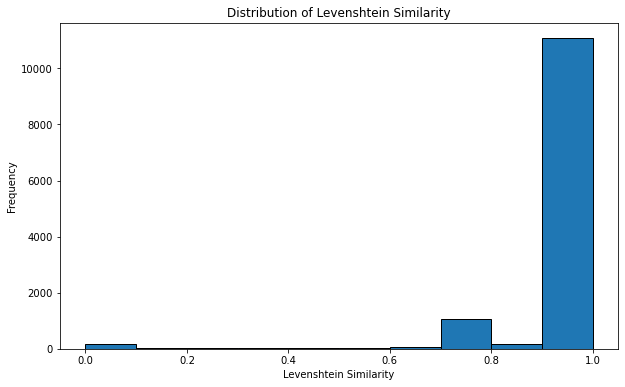

In [98]:
plt.figure(figsize=(10, 6))

print( 'similarity perc for each value : ' ,'\n' ,  df_group['levenshtein_similarity'].value_counts(normalize=True).head() ) 

plt.hist(df_group['levenshtein_similarity'], bins=10, edgecolor='black')
plt.title('Distribution of Levenshtein Similarity')
plt.xlabel('Levenshtein Similarity')
plt.ylabel('Frequency')
plt.show() 

In [99]:
duplicated_rows = df_group[df_group.duplicated(subset=['Groupe'], keep=False)]

# Print duplicated rows
duplicated_rows.head()

GROUP_ID                                    Groupe Nom du responsable  \
144        145    OLD SUPPORT SIGNATURE ELECTRONIQUE DSI   Diot, Christophe   
1249      1298          DHL_VAL_PRO_SHP:Innovation PNord                NaN   
1263      1312         DHL_VAL_PRO_SHP:Bpifrance Digital                NaN   
1287      1336  DHL_VAL_PRO_SHP:Team Export DR Marseille                NaN   
1293      1342  DHL_VAL_PRO_SHP:Team Export DR Marseille                NaN   

      Niveau du groupe    Pays  Alerte Mail Employee du groupe Type groupe  \
144                  2  France            1                NaN        DPSM   
1249                 8  France            1                NaN         DHL   
1263                 8  France            1                NaN         DHL   
1287                 8  France            1                NaN         DHL   
1293                 8  France            1                NaN         DHL   

     Profil manager Date de fin Courriel Train  E_IS_SHARED_SERVICE  \
144   OPERATEUR DSI  30/07/2020      NaN   NaN                  NaN   
1249            NaN         NaN      NaN   NaN                  NaN   
1263            NaN         NaN      NaN   NaN                  NaN   
1287            NaN         NaN      NaN   NaN                  NaN   
1293            NaN         NaN      NaN   NaN                  NaN   

                                            Commentaire  \
144   Renommage du groupe "REF SIGNATURE SUPPORT" en...   
1249                                                NaN   
1263                                                NaN   
1287  Création du groupe suite à la création profil ...   
1293  Création du groupe suite à la création profil ...   

                                      GROUP_SP  levenshtein_similarity  
144                      REF SIGNATURE SUPPORT                0.315789  
1249          DHL_VAL_PRO_SHP:Innovation PNord                1.000000  
1263         DHL_VAL_PRO_SHP:Bpifrance Digital                1.000000  
1287  DHL_VAL_PRO_SHP:Team Export DR Marseille                1.000000  
1293  DHL_VAL_PRO_SHP:Team Export DR Marseille                1.000000

In [100]:
value = 'OLD SUPPORT SIGNATURE ELECTRONIQUE DSI'

df_group[df_group['Groupe'] == value] 
for value in df_group[df_group['Groupe'] == value]['Commentaire']:
    print(value) 

GROUP_ID                                  Groupe Nom du responsable  \
144        145  OLD SUPPORT SIGNATURE ELECTRONIQUE DSI   Diot, Christophe   
2382      2458  OLD SUPPORT SIGNATURE ELECTRONIQUE DSI     Loyer, Nicolas   

      Niveau du groupe    Pays  Alerte Mail  \
144                  2  France            1   
2382                20  France            1   

                                     Employee du groupe Type groupe  \
144                                                 NaN        DPSM   
2382  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...        DPSM   

     Profil manager          Date de fin Courriel Train  E_IS_SHARED_SERVICE  \
144   OPERATEUR DSI           30/07/2020      NaN   NaN                  NaN   
2382  OPERATEUR DSI  16/03/2022 16:02:20      NaN   NaN                  NaN   

                                            Commentaire  \
144   Renommage du groupe "REF SIGNATURE SUPPORT" en...   
2382  Renommage du groupe "PSU_RUN_SUPPORT_SIGNATURE...   

                                    GROUP_SP  levenshtein_similarity  
144                    REF SIGNATURE SUPPORT                0.315789  
2382  PSU_RUN_SUPPORT_SIGNATURE_ELECTRONIQUE                0.631579

Renommage du groupe "REF SIGNATURE SUPPORT" en "SUPPORT SIGNATURE ELECTRONIQUE DSI" suite à la demande S200729_0528
Renommage du groupe "PSU_RUN_SUPPORT_SIGNATURE_ELECTRONIQUE" en "PSU SUPPORT SIGNATURE ELECTRONIQUE" suite à la demande S190514_0064Renommage du groupe "PSU SUPPORT SIGNATURE ELECTRONIQUE" en "SUPPORT SIGNATURE ELECTRONIQUE DSI" suite à la demande S200724_0136Ajout d'utilisateurs suite à la demande S220105_0069Ajout de l'utilisateur Orcel delmas, Carole suite à la demande S220105_0069Archivage du groupe "SUPPORT SIGNATURE ELECTRONIQUE DSI" suite à la demande S220316_0275


In [101]:
duplicated_rows_renom = duplicated_rows[duplicated_rows['Commentaire'].str.contains('Renommage', na=False)]
duplicated_rows_renom    

GROUP_ID                                  Groupe Nom du responsable  \
144        145  OLD SUPPORT SIGNATURE ELECTRONIQUE DSI   Diot, Christophe   
2382      2458  OLD SUPPORT SIGNATURE ELECTRONIQUE DSI     Loyer, Nicolas   

      Niveau du groupe    Pays  Alerte Mail  \
144                  2  France            1   
2382                20  France            1   

                                     Employee du groupe Type groupe  \
144                                                 NaN        DPSM   
2382  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...        DPSM   

     Profil manager          Date de fin Courriel Train  E_IS_SHARED_SERVICE  \
144   OPERATEUR DSI           30/07/2020      NaN   NaN                  NaN   
2382  OPERATEUR DSI  16/03/2022 16:02:20      NaN   NaN                  NaN   

                                            Commentaire  \
144   Renommage du groupe "REF SIGNATURE SUPPORT" en...   
2382  Renommage du groupe "PSU_RUN_SUPPORT_SIGNATURE...   

                                    GROUP_SP  levenshtein_similarity  
144                    REF SIGNATURE SUPPORT                0.315789  
2382  PSU_RUN_SUPPORT_SIGNATURE_ELECTRONIQUE                0.631579

In [102]:
df_group['Commentaire_BREIF'] = df_group['Commentaire'].str.split().str[:3].str.join(' ')
df_group.head() 

GROUP_ID                     Groupe   Nom du responsable  Niveau du groupe  \
0         1                    AGI ABD  Villemain, Stephane                 2   
1         2             AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3               DAST AIN ESA     Kajdan, Stephane                 2   
3         4           OLD TEAM SYSTEME                  NaN                20   
4         5  OCO - EXPERTISE OFFICE365       Deleage, Marie                 2   

     Pays  Alerte Mail                                 Employee du groupe  \
0  France            1                                                NaN   
1  France            1                                                NaN   
2  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   
3  France            1  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...   
4  France            1  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...   

  Type groupe            Profil manager          Date de fin Courriel  \
0         DBA             OPERATEUR DSI           24/04/2019      NaN   
1        DAST  OPERATEUR + GESTION PARC           12/09/2017      NaN   
2        DAST  OPERATEUR + GESTION PARC                  NaN      NaN   
3        DAST                       NaN  26/01/2024 16:07:56      NaN   
4       Train            ADMINISTRATEUR                  NaN      NaN   

       Train  E_IS_SHARED_SERVICE  \
0        NaN                  NaN   
1        NaN                  NaN   
2        NaN                  NaN   
3        NaN                  NaN   
4  Hyperloop                  NaN   

                                         Commentaire        GROUP_SP  \
0  Archivage du groupe suite à la demande : S1904...         AGI ABD   
1                                                NaN  AGI AIN BACKUP   
2  Renommage du groupe "AGI AIN ESA" en "DAST AIN...     AGI AIN ESA   
3  Renommage du groupe "AGI AIN INFR" en "DAST AI...    AGI AIN INFR   
4  Renommage du groupe "AGI AIN MSG" en "DAST AIN...     AGI AIN MSG   

   levenshtein_similarity    Commentaire_BREIF  
0                   1.000  Archivage du groupe  
1                   1.000                  NaN  
2                   0.750  Renommage du groupe  
3                   0.125  Renommage du groupe  
4                   0.120  Renommage du groupe

In [103]:
df_group['Commentaire_BREIF'].value_counts(normalize=True).head(20) 

Création du groupe                  0.831957
Correspondant DHL                   0.027944
Ajout de l'utilisateur              0.023752
Suppression de l'utilisateur        0.020196
Création de l'Agile                 0.018671
Archivage du groupe                 0.016004
Ajout d'utilisateurs suite          0.010034
Renommage du groupe                 0.009145
09/01/2019 : mise                   0.003683
Correspondant DHLAjout de           0.003048
Modification du nom                 0.002159
Mise à jour                         0.001778
Archivage suite à                   0.001778
MAJ suite à                         0.001651
Suppression d'utilisateurs suite    0.001651
Ancien groupe LH                    0.001524
Désactivation suite à               0.001270
Création suite à                    0.001270
Correspondant DHLSuppression de     0.001270
Agile TeamTrain /                   0.001143
Name: Commentaire_BREIF, dtype: float64

In [20]:
df_group.drop_duplicates(subset=['Groupe'], inplace=True)


In [112]:
df_group.head() 

GROUP_ID                     Groupe   Nom du responsable  Niveau du groupe  \
0         1                    AGI ABD  Villemain, Stephane                 2   
1         2             AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3               DAST AIN ESA     Kajdan, Stephane                 2   
3         4           OLD TEAM SYSTEME                  NaN                20   
4         5  OCO - EXPERTISE OFFICE365       Deleage, Marie                 2   

                                  Employee du groupe Type groupe  \
0                                                NaN         DBA   
1                                                NaN        DAST   
2  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...        DAST   
3  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...        DAST   
4  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...       Train   

             Profil manager          Date de fin  \
0             OPERATEUR DSI           24/04/2019   
1  OPERATEUR + GESTION PARC           12/09/2017   
2  OPERATEUR + GESTION PARC                  NaN   
3                       NaN  26/01/2024 16:07:56   
4            ADMINISTRATEUR                  NaN   

                                         Commentaire        GROUP_SP  \
0  Archivage du groupe suite à la demande : S1904...         AGI ABD   
1                                                NaN  AGI AIN BACKUP   
2  Renommage du groupe "AGI AIN ESA" en "DAST AIN...     AGI AIN ESA   
3  Renommage du groupe "AGI AIN INFR" en "DAST AI...    AGI AIN INFR   
4  Renommage du groupe "AGI AIN MSG" en "DAST AIN...     AGI AIN MSG   

   levenshtein_similarity    Commentaire_BREIF  
0                   1.000  Archivage du groupe  
1                   1.000                  NaN  
2                   0.750  Renommage du groupe  
3                   0.125  Renommage du groupe  
4                   0.120  Renommage du groupe

In [113]:
df_group.drop(columns=['Commentaire' , 'GROUP_SP' , 'levenshtein_similarity' , 'Commentaire_BREIF'] , inplace=True)

In [115]:
df_group.head() 

GROUP_ID                     Groupe   Nom du responsable  Niveau du groupe  \
0         1                    AGI ABD  Villemain, Stephane                 2   
1         2             AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3               DAST AIN ESA     Kajdan, Stephane                 2   
3         4           OLD TEAM SYSTEME                  NaN                20   
4         5  OCO - EXPERTISE OFFICE365       Deleage, Marie                 2   

                                  Employee du groupe Type groupe  \
0                                                NaN         DBA   
1                                                NaN        DAST   
2  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...        DAST   
3  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...        DAST   
4  \r\nLogin\r\nNom, Prénom\r\n  \t\t\t\tM93280Mo...       Train   

             Profil manager          Date de fin  
0             OPERATEUR DSI           24/04/2019  
1  OPERATEUR + GESTION PARC           12/09/2017  
2  OPERATEUR + GESTION PARC                  NaN  
3                       NaN  26/01/2024 16:07:56  
4            ADMINISTRATEUR                  NaN

In [33]:
import re

df_group_1 = df_group.copy() 

df_group_1['Employee du groupe'] = df_group_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) 
                                    # .str.replace(r'LoginNom,Prénom', '', regex=True) #\
                                    # .str.replace(r'\s+', '', regex=True) 



for value in df_group_1['Employee du groupe'] : 
    print(value)


nan
nan
LoginNom,PrénomM93280Morelbiron,CaroleM16287Galindo,ChristopheM67432USER,RESTAINM67937Saillant,Alexandre
LoginNom,PrénomM16436Bailly,MalikM91846Benali,YoussefM04578Fadel,MehdiM54475Gerbaud,AlexandreM81480Hamaniabdou,AboubacarM13160Martin,JeanmathieuM79077Pacholek,DavidM27968Traore,BakariM50493Visouthiphongs,JeremieM36612Zagar,Antonio
LoginNom,PrénomM93280Morelbiron,CaroleM16287Galindo,ChristopheM67432USER,RESTAINM67937Saillant,Alexandre
nan
nan
LoginNom,PrénomM15951Raholijaona,HugM35553Etiennejeannette,DavidM19171Soussen,HenriM69061Yapnewkpin,SteevenM28328Arroyo,MarcM33769Dasilvabastos,BrunoM62802Denozi,DavidM04716Bouton,WarrenM02869Mlikaboukhris,NessimM19468Emile,ChristopherM66041Nguon,PatrickM04133Albrecht,FrédéricM95593Berrah,AchourM08368span
LoginNom,PrénomM12998Wintrebert,AlexandreM74677Santosteixeira,AntoniojoséM75032Boucher,NicolasM53941Rousseau,JoachimM05783Albert,Pierrejean
LoginNom,PrénomM12998Wintrebert,AlexandreM74677Santosteixeira,AntoniojoséM75032Boucher,NicolasM5

In [276]:

df_group_1[df_group_1['Employee du groupe'].str.startswith('LoginNom,Prénom')==False][['Employee du groupe']].to_csv('hhhhh.csv' , index=False)


In [112]:
df_exc = df_group_1[df_group_1['Employee du groupe'].str.startswith('LoginNom,Prénom')==False][['Employee du groupe']]

for value in df_exc['Employee du groupe'] : 
    print(value)

Rahal,HadyM78761PODin,ZainaM16883DEVBreton,FrançoisM07631DEVRoy,PascalM10725SMLhuisset,FranckM30955CSDantoni,LéoM17938DEV
AgileTeamTrainSharedServiceNom,PrénomLoginRôleSM,PO,PowerDesignerShSArchitectureEntrepriseChampalier,BrunoM91344POPowerDesignerShSArchitectureEntrepriseSmaili,TaharM09428DEV
Nom,PrénomLoginRôleEmery,OlivierM84766Godard,SylvieM26391POFam,AdjaratouM81025PO
AgileTeamTrainSharedServiceNom,PrénomLoginHBOHelpBOTHyperloopTayeye,ArnaudM18751HBOHelpBOTHyperloopBougeant,MatthieuM20577HBOHelpBOTHyperloopTaillefer,JemuelM45486HBOHelpBOTHyperloopParlier,HugoM73195HBOHelpBOTHyperloopBaroudi,MohammedM87132HBOHelpBOTHyperloopBouskila,AdamM12619HBOHelpBOTHyperloopUrbino,VéroniqueM97556
Nom,PrénomLoginRôleJesus,RicardoMA4327PONembot,AchilleM20653SM
Efsathiu,ThomasM12228Violon,ThibaultM67409PO
Toilliez,GaëtanM45117DEVRoy,PascalM10725SMLhuisset,FranckM30955CS
AgileTeamTrainSharedServiceNom,PrénomLoginRôleSM,PO,APEAPIEVENTHyperloopWintrebert,AlexandreM12998DEVAPEAPIEVENTHyperloopSantost

In [63]:
df_exc = pd.read_csv('hhhhh.csv')  
dfffffffffffffff = df_exc[(df_exc['Employee du groupe'].str.startswith('AgileTeamNom,PrénomLoginRôle')==False) & (df_exc['Employee du groupe'].str.startswith('AgileTeamTrainSharedServiceNom')==False)  ]
for value in dfffffffffffffff['Employee du groupe'] : 
    print(value)   


Rahal,HadyM78761PODin,ZainaM16883DEVBreton,FrançoisM07631DEVRoy,PascalM10725SMLhuisset,FranckM30955CSDantoni,LéoM17938DEV
Nom,PrénomLoginRôleEmery,OlivierM84766Godard,SylvieM26391POFam,AdjaratouM81025PO
Nom,PrénomLoginRôleJesus,RicardoMA4327PONembot,AchilleM20653SM
Efsathiu,ThomasM12228Violon,ThibaultM67409PO
Toilliez,GaëtanM45117DEVRoy,PascalM10725SMLhuisset,FranckM30955CS
Nom,PrénomLoginRôleFam,AdjaratouM81025POBenhafsia,HoucemM37384PONembot,AchilleM20653SM
Nom,PrénomLoginRôleBenhafsia,HoucemM37384PONembot,AchilleM20653SM
Godard,SylvieM26391PONembot,AchilleM20653SMDarriet,AlexandreM85245PO
LoginemployésNomemployésRôleM01421Benzayer,AnassCSM08456Sabil,SaraM15480Zraraa,BahaeaddineDEVM16530Ayyache,AmalM20753Turki,MohamedaliTECHLEADM25832Benmansour,YassineDEVM29048Elmoqqaddem,YounesOPSM63049Andre,SanguitaPOM81537Elhaddad,MarouanSMM84129Mehtaj,YassinePMM91079Taghi,ChakibOPSM94392Salihi,FatimazahraDEV
LoginemployésNomemployésRôleM11570Bouhamed,NihelSMM18894Azzouzi,IlyassPMM73181Filin,Yoann

In [70]:
df_exc = pd.read_csv('hhhhh.csv')  

df_3 = df_exc[df_exc['Employee du groupe'].str.startswith('Nom,PrénomLoginRôle')==True  ]
for value in df_3['Employee du groupe'] : 
    print(value)

Nom,PrénomLoginRôleEmery,OlivierM84766Godard,SylvieM26391POFam,AdjaratouM81025PO
Nom,PrénomLoginRôleJesus,RicardoMA4327PONembot,AchilleM20653SM
Nom,PrénomLoginRôleFam,AdjaratouM81025POBenhafsia,HoucemM37384PONembot,AchilleM20653SM
Nom,PrénomLoginRôleBenhafsia,HoucemM37384PONembot,AchilleM20653SM
Nom,PrénomLoginRôleChapuzot,JulienM90453POElfchtali,SaadM95448Elorf,KhamssaM26718Khadraoui,HoussemM22733TechLeadLemouneau,RomainM22711SMLieval,VincentM39466Mtiraoui,NizarM27408Olugbeje,SophieM14087POSavarit,CyrilleM13317PODorbes,FrancisM55276PMSanchez,EricM13284RTE
Nom,PrénomLoginRôleAitbouda,HamidM57439Kezzar,FedhM57290SMLefaux,MaximeM80888POVong,DavidM13295Dorbes,FrancisM55276PMSanchez,EricM13284RTE
Nom,PrénomLoginRôleLai,XiaochenM55672PORahmouni,InesM44379Sediri,MohamedM55560techleadTaquet,PierreM32311TSHOUONGANG,EstelleM72078SMZouiten,MohamedfehmiM00465Dorbes,FrancisM55276PMSanchez,EricM13284RTE
Nom,PrénomLoginRôleBatel,LyesM08023Bentaybi,WiamM80184POCote,GuillaumeM70134PONdiaye,MoussaM6434

In [110]:
# df_ag_nom_pre_role = df_exc[(df_exc['Employee du groupe'].str.startswith('AgileTeamNom,PrénomLoginRôle')==True) |(df_exc['Employee du groupe'].str.startswith('AgileTeamTrainSharedServiceNom')==True)  ]
df_ag_nom_pre_role = df_exc[df_exc['Employee du groupe'].str.startswith('AgileTeamTrainSharedServiceNom')==True  ]

for values in df_ag_nom_pre_role['Employee du groupe'] :  
    print(values)                   

AgileTeamTrainSharedServiceNom,PrénomLoginRôleSM,PO,PowerDesignerShSArchitectureEntrepriseChampalier,BrunoM91344POPowerDesignerShSArchitectureEntrepriseSmaili,TaharM09428DEV
AgileTeamTrainSharedServiceNom,PrénomLoginHBOHelpBOTHyperloopTayeye,ArnaudM18751HBOHelpBOTHyperloopBougeant,MatthieuM20577HBOHelpBOTHyperloopTaillefer,JemuelM45486HBOHelpBOTHyperloopParlier,HugoM73195HBOHelpBOTHyperloopBaroudi,MohammedM87132HBOHelpBOTHyperloopBouskila,AdamM12619HBOHelpBOTHyperloopUrbino,VéroniqueM97556
AgileTeamTrainSharedServiceNom,PrénomLoginRôleSM,PO,APEAPIEVENTHyperloopWintrebert,AlexandreM12998DEVAPEAPIEVENTHyperloopSantosteixeira,AntoniojoséM74677DEVAPEAPIEVENTHyperloopRousseau,JoachimM53941TechLead,SECURITYAPEAPIEVENTHyperloopBouskila,AdamM12619SMAPEAPIEVENTHyperloopSalhaji,NizarM08067POAPEAPIEVENTHyperloopAlbert,PierrejeanM05783DEV
AgileTeamTrainSharedServiceNom,PrénomLoginRôleSM,PO,LFELaForgeHyperloopJackowski,DenisM12195PO,SECURITYLFELaForgeHyperloopAbdesselem,HatemM05784SMLFELaForgeHyper

In [109]:
##############################################


######### AgileTeamTrainSharedServiceNom,PrénomLoginRôle Mehod 1 works 


##############################################




import pandas as pd
import re

def extract_user_details(text):
    if not isinstance(text, str):
        raise TypeError("Expected string or bytes-like object")

    # Regular expression to match the general pattern
    pattern = re.compile(r'([A-Z][a-zA-Zéèàêâôûïçë]+),([A-Z][a-zA-Zéèàêâôûïçë]+)(MA?\d+)')
    matches = pattern.findall(text)
    
    user_info = []
    for match in matches:
        raw_last_name, first_name, login = match
        
        # Extract last name by iterating from the end until an uppercase letter is found
        last_name = ""
        for char in reversed(raw_last_name):
            if char.isupper() and last_name:
                last_name = char + last_name    
                break
            last_name = char + last_name
        
        user_info.append({
            'FirstName': first_name,
            'LastName': last_name,
            'Login': login
        })
    
    return user_info


df_ag_nom_pre_role['Employee du groupe'] = df_ag_nom_pre_role['Employee du groupe'].astype(str)

# Apply the function to each row and concatenate the results
user_info_list = df_ag_nom_pre_role['Employee du groupe'].apply(extract_user_details).explode().dropna().tolist()

# Create DataFrame
user_info_df = pd.DataFrame(user_info_list)

# Drop duplicates based on 'Login' column
user_info_df = user_info_df.drop_duplicates(subset=['Login'])

# Display the resulting DataFrame
for value in user_info_df['Login'] : 
    print(value)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16300\1408650070.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ag_nom_pre_role['Employee du groupe'] = df_ag_nom_pre_role['Employee du groupe'].astype(str)


FirstName    LastName   Login
0      Bruno  Champalier  M91344
1      Tahar      Smaili  M09428
2     Arnaud      Tayeye  M18751
3   Matthieu    Bougeant  M20577
4     Jemuel   Taillefer  M45486
..       ...         ...     ...
62     Elias      Bahjat  M22742
63     Anwar     Borsali  M09226
64   Olivier      Stassi  M59137
66     Mehdi       Zyane  M85630
67     Uriel    Sarrazin  M01379

[65 rows x 3 columns]

In [56]:
import pandas as pd
import re
from nameparser import HumanName


def extract_user_info(value):
    pattern = re.compile(r'([A-Za-z]+),([A-Za-z]+)(M\d{5}|MA\d{4})')
    matches = pattern.findall(value)
    
    parsed_users = []
    for match in matches:
        full_last_name, first_name, login = match
        # Extract the actual last name by scanning backward for uppercase letters
        for i in range(len(full_last_name) - 1, -1, -1):
            if full_last_name[i].isupper():
                last_name = full_last_name[i:]
                break
        
        name = HumanName(f"{first_name} {last_name}")
        parsed_users.append({
            'FirstName': name.first,
            'LastName': name.last,
            'Login': login
        })
    return parsed_users

# Apply the function to extract the user information
df_ag_nom_pre_role['user_info'] = df_ag_nom_pre_role['Employee du groupe'].apply(extract_user_info)

user_info_expanded = df_ag_nom_pre_role.explode('user_info').reset_index(drop=True)
user_info_expanded = pd.concat([user_info_expanded.drop(['user_info'], axis=1), 
                                user_info_expanded['user_info'].apply(pd.Series)], axis=1)



# Drop duplicates
user_info_expanded = user_info_expanded.drop_duplicates()
user_info_expanded[['FirstName' , 'LastName','Login']].to_csv('employees3.csv',index=False)
# for values in df_ag_nom_pre_role['user_info'] : 
#     print(values) 

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16300\1916173333.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ag_nom_pre_role['user_info'] = df_ag_nom_pre_role['Employee du groupe'].apply(extract_user_info)


In [46]:
df_ag_nom_pre_role = df_exc[df_exc['Employee du groupe'].str.startswith('AgileTeamNom,PrénomLoginRôle')==True]
for values in df_ag_nom_pre_role['Employee du groupe'] : 
    print(values)  

AgileTeamNom,PrénomLoginRôleBFRBpifrancefrGaudeix,ChristopheM02432PO
AgileTeamNom,PrénomLoginRôleDEEDeeptechWahid,WafaaM93550PODEEDeeptechDjeffal,RhitaM91080DEVDEEDeeptechTaleh,ImadM59561SMDEEDeeptechVieira,FranckM12311DEVDEEDeeptechVines,AlexandramonicaM78201TechLead
AgileTeamNom,PrénomLoginRôleEQYEuroquityMonsonego,AlexandreM80906RespsocleEQYEuroquityAssire,CyrilleM93959POEQYEuroquityNagbo,AmelineM99217POEQYEuroquitySalomon,LorraineM12394SMEQYEuroquityJoye,JulienM21920DEVEQYEuroquityDupuy,PierreAlexandreM10367DEVEQYEuroquityEnrique,NereaM19764DEVEQYEuroquityPerussel,NicolasM11673DEVEQYEuroquityCointet,ThibautM17366DEVEQYEuroquityAmri,MarwenM21909DEVEQYEuroquityPerrot,BastienM98369DEV
AgileTeamNom,PrénomLoginRôleHUBLeHubProia,SébastienM10590POHUBLeHubIssialh,OzounguetM82920POHUBLeHubIbarra,DavidM47137DEVHUBLeHubThiry,RobinM16310DEVHUBLeHubValsamouStanislawski,AlexandreM61162DEV
AgileTeamNom,PrénomLoginRôleLCBFTLCBFTMIDOHOUNGBE,WilliamM08114RespsocleLCBFTLCBFTWague,PapadallaM09050POLCB

In [48]:
import pandas as pd
import re
from nameparser import HumanName


def extract_user_info(value):
    pattern = re.compile(r'([A-Za-z]+),([A-Za-z]+)(M\d{5}|MA\d{4})')
    matches = pattern.findall(value)
    
    parsed_users = []
    for match in matches:
        full_last_name, first_name, login = match
        # Extract the actual last name by scanning backward for uppercase letters
        for i in range(len(full_last_name) - 1, -1, -1):
            if full_last_name[i].isupper():
                last_name = full_last_name[i:]
                break
        
        name = HumanName(f"{first_name} {last_name}")
        parsed_users.append({
            'FirstName': name.first,
            'LastName': name.last,
            'Login': login
        })
    return parsed_users

# Apply the function to extract the user information
df_exc['user_info'] = df_exc['Employee du groupe'].apply(extract_user_info)


for values in df_exc['user_info'] : 
    print(values) 

[{'FirstName': 'Hady', 'LastName': 'Rahal', 'Login': 'M78761'}, {'FirstName': 'Zaina', 'LastName': 'Din', 'Login': 'M16883'}, {'FirstName': 'Pascal', 'LastName': 'Roy', 'Login': 'M10725'}, {'FirstName': 'Franck', 'LastName': 'Lhuisset', 'Login': 'M30955'}]
[{'FirstName': 'Bruno', 'LastName': 'Champalier', 'Login': 'M91344'}, {'FirstName': 'Tahar', 'LastName': 'Smaili', 'Login': 'M09428'}]
[{'FirstName': 'Olivier', 'LastName': 'Emery', 'Login': 'M84766'}, {'FirstName': 'Sylvie', 'LastName': 'Godard', 'Login': 'M26391'}, {'FirstName': 'Adjaratou', 'LastName': 'Fam', 'Login': 'M81025'}]
[{'FirstName': 'Arnaud', 'LastName': 'Tayeye', 'Login': 'M18751'}, {'FirstName': 'Matthieu', 'LastName': 'Bougeant', 'Login': 'M20577'}, {'FirstName': 'Jemuel', 'LastName': 'Taillefer', 'Login': 'M45486'}, {'FirstName': 'Hugo', 'LastName': 'Parlier', 'Login': 'M73195'}, {'FirstName': 'Mohammed', 'LastName': 'Baroudi', 'Login': 'M87132'}, {'FirstName': 'Adam', 'LastName': 'Bouskila', 'Login': 'M12619'}]
[{'

In [17]:
import pandas as pd
import re
from nameparser import HumanName


def extract_user_info(value):
    pattern = re.compile(r'([A-Za-z]+),([A-Za-z]+)(M\d{5}|MA\d{4})')
    matches = pattern.findall(value)
    
    parsed_users = []
    for match in matches:
        full_last_name, first_name, login = match
        # Extract the actual last name by scanning backward for uppercase letters
        for i in range(len(full_last_name) - 1, -1, -1):
            if full_last_name[i].isupper():
                last_name = full_last_name[i:]
                break
        
        name = HumanName(f"{first_name} {last_name}")
        parsed_users.append({
            'FirstName': name.first,
            'LastName': name.last,
            'Login': login
        })
    return parsed_users

# Apply the function to extract the user information
df_ag_nom_pre_role['user_info'] = df_ag_nom_pre_role['Employee du groupe'].apply(extract_user_info)


for values in df_ag_nom_pre_role['user_info'] : 
    print(values) 

[{'FirstName': 'Christophe', 'LastName': 'Gaudeix', 'Login': 'M02432'}]
[{'FirstName': 'Wafaa', 'LastName': 'Wahid', 'Login': 'M93550'}, {'FirstName': 'Rhita', 'LastName': 'Djeffal', 'Login': 'M91080'}, {'FirstName': 'Imad', 'LastName': 'Taleh', 'Login': 'M59561'}, {'FirstName': 'Franck', 'LastName': 'Vieira', 'Login': 'M12311'}, {'FirstName': 'Alexandramonica', 'LastName': 'Vines', 'Login': 'M78201'}]
[{'FirstName': 'Alexandre', 'LastName': 'Monsonego', 'Login': 'M80906'}, {'FirstName': 'Cyrille', 'LastName': 'Assire', 'Login': 'M93959'}, {'FirstName': 'Ameline', 'LastName': 'Nagbo', 'Login': 'M99217'}, {'FirstName': 'Lorraine', 'LastName': 'Salomon', 'Login': 'M12394'}, {'FirstName': 'Julien', 'LastName': 'Joye', 'Login': 'M21920'}, {'FirstName': 'PierreAlexandre', 'LastName': 'Dupuy', 'Login': 'M10367'}, {'FirstName': 'Nerea', 'LastName': 'Enrique', 'Login': 'M19764'}, {'FirstName': 'Nicolas', 'LastName': 'Perussel', 'Login': 'M11673'}, {'FirstName': 'Thibaut', 'LastName': 'Cointet'

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16300\1617263993.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ag_nom_pre_role['user_info'] = df_ag_nom_pre_role['Employee du groupe'].apply(extract_user_info)


In [38]:
df_group_1_1 = df_group_1[(df_group_1['Employee du groupe'].str.startswith('LoginNom,Prénom')==True) | (df_group_1['Employee du groupe'].isnull() ) ]

In [39]:
df_group_1_1.head(3)  

GROUP_ID          Groupe   Nom du responsable  Niveau du groupe  \
0         1         AGI ABD  Villemain, Stephane                 2   
1         2  AGI AIN BACKUP     Kajdan, Stephane                 2   
2         3    DAST AIN ESA     Kajdan, Stephane                 2   

                                  Employee du groupe Type groupe  \
0                                                NaN         DBA   
1                                                NaN        DAST   
2  LoginNom,PrénomM93280Morelbiron,CaroleM16287Ga...        DAST   

             Profil manager Date de fin  \
0             OPERATEUR DSI  24/04/2019   
1  OPERATEUR + GESTION PARC  12/09/2017   
2  OPERATEUR + GESTION PARC         NaN   

                                         Commentaire          GROUP_SP  
0  Archivage du groupe suite à la demande : S1904...         [AGI ABD]  
1                                                NaN  [AGI AIN BACKUP]  
2  Renommage du groupe "AGI AIN ESA" en "DAST AIN...     [AGI AIN ESA]

In [115]:
df = pd.read_excel('Incident OT2_Complet (1).xlsx')
df.columns

Index(['Numéro ticket', 'Statut', 'Priorité', 'Date de création',
       'Date de création de l'action en cours',
       'Date de prise en charge de l'action en cours', 'Sujet',
       'Brève description', 'Objet de l'incident', 'Groupe', 'Type de groupe',
       'Intervenant', 'Solution',
       'Entité du responsable du groupe de la dernière action', 'Cause réelle',
       'Code Appli', 'Code Domaine', 'Incident pére', 'N° Problème',
       'Bénéficiaire', 'Date de résolution'],
      dtype='object')

In [119]:
df[df['Code Appli']=='BUO']

Numéro ticket                   Statut Priorité    Date de création  \
0      I160519_0150  Clôturé automatiquement        3 2016-05-19 10:41:48   
7      I160520_0185  Clôturé automatiquement        2 2016-05-20 16:33:02   
82     I160531_0218  Clôturé automatiquement        3 2016-05-31 19:42:55   
102    I160603_0018  Clôturé automatiquement        3 2016-06-03 09:11:49   
189    I160616_0088                  Clôturé        3 2016-06-16 12:29:12   
...             ...                      ...      ...                 ...   
10890  I210319_0070                 En cours        2 2021-03-19 10:08:03   
10891  I210319_0076                 En cours        2 2021-03-19 10:16:56   
10892  I210319_0111                 En cours        2 2021-03-19 11:18:51   
10894  I210319_0230                 En cours        2 2021-03-19 16:33:51   
10899  I210322_0172                 En cours        2 2021-03-22 11:49:28   

      Date de création de l'action en cours  \
0                       2016-05-19 13:49:12   
7                       2016-05-20 16:35:40   
82                      2016-06-01 20:12:20   
102                     2016-06-06 18:17:23   
189                     2016-06-16 13:25:09   
...                                     ...   
10890                   2021-03-19 14:23:10   
10891                   2021-03-19 10:42:59   
10892                   2021-03-19 11:42:11   
10894                   2021-03-19 16:39:14   
10899                   2021-03-22 13:25:34   

      Date de prise en charge de l'action en cours  \
0                              2016-08-31 17:19:26   
7                              2016-05-25 10:10:07   
82                             2016-06-01 20:12:20   
102                            2016-06-06 18:17:23   
189                            2016-06-21 15:26:32   
...                                            ...   
10890                          2021-03-19 14:23:10   
10891                          2021-03-19 10:42:59   
10892                          2021-03-19 11:42:11   
10894                          2021-03-19 16:39:14   
10899                          2021-03-22 13:25:34   

                                           Sujet Brève description  \
0      Incidents/Informatique/Application métier               NaN   
7      Incidents/Informatique/Application métier               NaN   
82     Incidents/Informatique/Application métier               NaN   
102    Incidents/Informatique/Application métier               NaN   
189    Incidents/Informatique/Application métier               NaN   
...                                          ...               ...   
10890  Incidents/Informatique/Application métier               NaN   
10891  Incidents/Informatique/Application métier               NaN   
10892  Incidents/Informatique/Application métier               NaN   
10894  Incidents/Informatique/Application métier               NaN   
10899  Incidents/Informatique/Application métier               NaN   

                                     Objet de l'incident             Groupe  \
0      Besoin de connexion aux bases de données suiva...          DATA PROD   
7      Bonjour,_x000D_\nJe déclare un incident pour M...          DATA PROD   
82     A l'attention de DIdier THISSELIN_x000D_\n_x00...          DATA PROD   
102    Bjr la requête 230 DLF CBM n'a toujours pas to...          DATA PROD   
189    Interrogation du Datamart SP : le rapport de l...          DATA PROD   
...                                                  ...                ...   
10890  Bonjour,J'ai crée une requête sur l'univers "C...     DATA REPORTING   
10891  Bonjour,Je n'arrive pas à lister les informati...        DATA QUALIF   
10892  J'ai le message d'erreur en copie du mail qui ...  DATA CORE BANKING   
10894  BonjourL'univers Mouvement de fond n’apparaît ...        DATA QUALIF   
10899  Bonjour, j'ai déclaré un incident de fonctionn...        DATA QUALIF   

       ...        Intervenant  \
0      ...  Feuillard, Pierre   
7      ... 

In [118]:
for values in df["Objet de l'incident"] : 
    print(values)

Besoin de connexion aux bases de données suivantes (mise à jour du fichier TNSNAMES.ORA de mon poste T3M19) :_x000D_
_x000D_
RCSDEVBAE.CEPME150.FR =(DESCRIPTION=(ADDRESS_LIST=(ADDRESS=(PROTOCOL=TCP) (HOST=T3S0C) (PORT=1521)))(CONNECT_DATA=(SID=PRMXDEV) (SERVER=DEDICATED)))_x000D_
_x000D_
CETDEVBAE.CEPME150.FR =(DESCRIPTION=(ADDRESS_LIST=(ADDRESS=(PROTOCOL=TCP) (HOST=T3S0C) (PORT=1521)))(CONNECT_DATA=(SID=CETDEV) (SERVER=DEDICATED)))
Bonjour,, _x000D_
Serait-il possible de mettre le type de registre " commerce" sur le partenaire bancaire_x000D_
Dans cette attente,_x000D_
Bien à vous
Bonjour merci d'indiquer Registre du commerce pour la banque suivante CP N°2975649  - BANQUE CIC SUD OUEST  _x000D_
cordialement
Je n'arrive pas et le correspondant informatique Mireille DEBRIEU non plus à créer le CP 005 880 679 •	SA COOPERATIVE D'INTERET COLLECTIF POURL'ACCESSION A LA PROPRIETE DE ST-NAZAIREET DE LA REGION DES PAYS DE LA LOIRE _x000D_
_x000D_
car ce siren est déjà attribué à une manque, cf

In [40]:
for value in df_group_1_1['Employee du groupe']:
    print(value )  

nan
nan
LoginNom,PrénomM93280Morelbiron,CaroleM16287Galindo,ChristopheM67432USER,RESTAINM67937Saillant,Alexandre
LoginNom,PrénomM16436Bailly,MalikM91846Benali,YoussefM04578Fadel,MehdiM54475Gerbaud,AlexandreM81480Hamaniabdou,AboubacarM13160Martin,JeanmathieuM79077Pacholek,DavidM27968Traore,BakariM50493Visouthiphongs,JeremieM36612Zagar,Antonio
LoginNom,PrénomM93280Morelbiron,CaroleM16287Galindo,ChristopheM67432USER,RESTAINM67937Saillant,Alexandre
nan
nan
LoginNom,PrénomM15951Raholijaona,HugM35553Etiennejeannette,DavidM19171Soussen,HenriM69061Yapnewkpin,SteevenM28328Arroyo,MarcM33769Dasilvabastos,BrunoM62802Denozi,DavidM04716Bouton,WarrenM02869Mlikaboukhris,NessimM19468Emile,ChristopherM66041Nguon,PatrickM04133Albrecht,FrédéricM95593Berrah,AchourM08368span
LoginNom,PrénomM12998Wintrebert,AlexandreM74677Santosteixeira,AntoniojoséM75032Boucher,NicolasM53941Rousseau,JoachimM05783Albert,Pierrejean
LoginNom,PrénomM12998Wintrebert,AlexandreM74677Santosteixeira,AntoniojoséM75032Boucher,NicolasM5

In [4]:
df_group = pd.read_csv('Groupes.csv' , delimiter=";" , header=0 )
df_group.drop(columns=['Unnamed: 15'] , inplace=True)

df_group[df_group['Groupe']=='AMI SIEGE']

GROUP_ID     Groupe        Nom du responsable  Niveau du groupe    Pays  \
18        19  AMI SIEGE  Etienne-jeannette, David                 1  France   

    Alerte Mail                                 Employee du groupe  \
18            0  \r\n\t\r\n\t\r\n\tLogin\r\n\tNom, Prénom\r\n\t...   

   Type groupe Profil manager Date de fin Courriel Train  E_IS_SHARED_SERVICE  \
18         AMI  OPERATEUR AMI         NaN      NaN   AMI                  NaN   

                                          Commentaire     GROUP_SP  
18  Suppression d'utilisateurs suite à la demande ...  [AMI SIEGE]

In [30]:
df_group = pd.read_csv('Groupes.csv' , delimiter=";" , header=0 )
df_group.drop(columns=['Unnamed: 15'] , inplace=True)
# Show the DataFrame
df_group.drop(columns=['Alerte Mail' , 'Pays' , 'Courriel' , 'E_IS_SHARED_SERVICE' , 'Train' ,'Commentaire' , 'GROUP_SP'  ] , inplace=True)
df_group.drop_duplicates(subset=['Groupe'], inplace=True)

df_group_1 = df_group.copy() 

df_group_1['Employee du groupe'] = df_group_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) 
                                    # .str.replace(r'LoginNom,Prénom', '', regex=True) #\
                                    # .str.replace(r'\s+', '', regex=True) 

df_group_1_1 = df_group_1[(df_group_1['Employee du groupe'].str.startswith('LoginNom,Prénom')==True) | (df_group_1['Employee du groupe'].isnull() ) ]

df_group_1_1 = df_group_1_1[df_group_1_1['Date de fin'].isnull() ] 

In [34]:
group_responsibles = {'Group_ID': [], 'Group_Name': [], 'Responsable': []}

# Iterate over each row in the DataFrame
for index, row in df_group_1_1.iterrows():
    group_id = row['GROUP_ID']
    group_name = row['Groupe']
    responsible = row['Nom du responsable']
    
    # Add group ID, group name, and responsible to the dictionary
    group_responsibles['Group_ID'].append(group_id)
    group_responsibles['Group_Name'].append(group_name)
    group_responsibles['Responsable'].append(responsible)

# Create DataFrame from the dictionary
df_group_1_1_responsibles = pd.DataFrame(group_responsibles)
df_group_1_1_responsibles.to_csv('group_resp.csv' , index=False)

GROUP_ID                                          Groupe  \
2             3                                    DAST AIN ESA   
4             5                       OCO - EXPERTISE OFFICE365   
5             6        ShS - FAMe-Flex et asset management TOIP   
7             8                                   ShS - AGI GIN   
8             9                               DAST ASI OSO APIM   
...         ...                                             ...   
12630     12828            DHL_VAL_PRO_TEAMS:TT_Dealflow IDF OM   
12631     12829  DHL_VAL_PRO_TEAMS:TO_Team Internationale Lille   
12637     12835                           DHL_AD:GGSLFRCFCTMPPD   
12638     12836                           DHL_AD:GGSLFRCFCTMMOA   
12639     12837                                DHL_AD:GGF5GUEST   

           Nom du responsable  Niveau du groupe  \
2            Kajdan, Stephane                 2   
4              Deleage, Marie                 2   
5           Cauchy, Guillaume                 2   
7      Da silva bastos, Bruno                 2   
8              Salhaji, Nizar                 2   
...                       ...               ...   
12630                     NaN                 8   
12631                     NaN                 8   
12637                     NaN                 8   
12638                     NaN                 8   
12639                     NaN                 8   

                                      Employee du groupe Type groupe  \
2      M93280Morelbiron,CaroleM16287Galindo,Christoph...        DAST   
4      M93280Morelbiron,CaroleM16287Galindo,Christoph...       Train   
5                                                    NaN       Train   
7      M15951Raholijaona,HugM35553Etiennejeannette,Da...       Train   
8      M12998Wintrebert,AlexandreM74677Santosteixeira...        DAST   
...                                                  ...         ...   
12630                                                NaN         DHL   
12631                                                NaN         DHL   
12637                                                NaN         DHL   
12638                                                NaN         DHL   
12639                                                NaN         DHL   

                 Profil manager Date de fin  \
2      OPERATEUR + GESTION PARC         NaN   
4                ADMINISTRATEUR         NaN   
5                 OPERATEUR DSI         NaN   
7      OPERATEUR + GESTION PARC         NaN   
8                 OPERATEUR DSI         NaN   
...                         ...         ...   
12630                       NaN         NaN   
12631                       NaN         NaN   
12637                       NaN         NaN   
12638                       NaN         NaN   
12639                       NaN         NaN   

                                               Login IDs  \
2                       [M93280, M16287, M67432, M67937]   
4                       [M93280, M16287, M67432, M67937]   
5                                                     []   
7      [M15951, M35553, M19171, M69061, M28328, M3376...   
8               [M12998, M74677, M75032, M53941, M05783]   
...                                                  ...   
12630                                                 []   
12631                                                 []   
12637                                                 []   
12638                                                 []   
12639                                                 []   

                                            Nom, Prenoms  
2      [Morelbiron Carole, Galindo Christophe, USER R...  
4      [Morelbiron Carole, Galindo Christophe, USER R...  
5                                                     []  
7      [Raholijaona Hug, Etiennejeannette David, Sous...  
8      [Wintrebert Alexandre, Santosteixeira Antonioj...  
...                                                  ...  
12630                    

In [9]:
#############################################



## LOGIN NOM PRENOM METHOD 1 



############################################





import numpy as np
import pandas as pd 
import re 

df_group_1_1['Employee du groupe'] = df_group_1_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) \
                                    .str.replace(r'LoginNom,Prénom', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) 



login_ids_list = []
nom_prenoms_list = []
employees_dict = {'ID': [], 'Name_LastName': []}

# Iterate over each row in the column
for value in df_group_1_1['Employee du groupe']:
    if isinstance(value, str):  # Check if the value is a string
        # Find all occurrences of the pattern "M" followed by five digits
        login_id_parts = re.findall(r'(M\d{5}|MA\d{4})', value)

        login_ids_row = []
        nom_prenoms_row = []

        for login_id in login_id_parts:
            # Extract the name and last name corresponding to the ID
            match = re.search(rf'{login_id}([a-zA-Z]+),([a-zA-Z]+)', value)
            if match:
                login_ids_row.append(login_id)
                nom_prenom = match.group(1) + ' ' + match.group(2)

                if nom_prenom.endswith('M') : 
                    nom_prenom = nom_prenom[:-1]
                elif nom_prenom.endswith('MA'):
                    nom_prenom = nom_prenom[:-2]

                nom_prenoms_row.append(nom_prenom)

                # Add to the dictionary if not already present
                if login_id not in employees_dict:
                    employees_dict[login_id] = nom_prenom
        
        # Append the row lists to the main lists
        login_ids_list.append(login_ids_row)
        nom_prenoms_list.append(nom_prenoms_row)

    else:
        # Append NaN values for missing rows
        login_ids_list.append(np.nan)
        nom_prenoms_list.append(np.nan)

# Create new columns in the DataFrame
df_group_1_1['Login IDs'] = login_ids_list
df_group_1_1['Nom, Prenoms'] = nom_prenoms_list

# Create a new DataFrame for employees
df_employees = pd.DataFrame(list(employees_dict.items()), columns=['ID', 'Nom, Prenom'])

df_employees.to_csv('employees.csv' , index=False) 

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\666575498.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_1_1['Employee du groupe'] = df_group_1_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\666575498.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_1_1['Login IDs'] = login_ids_list
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\666575498.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [26]:
#############################################



## LOGIN NOM PRENOM METHOD 1 



############################################





import numpy as np
import pandas as pd 
import re 

df_group_1_1['Employee du groupe'] = df_group_1_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) \
                                    .str.replace(r'LoginNom,Prénom', '', regex=True) \
                                    .str.replace(r'\s+', '', regex=True) 



login_ids_list = []
nom_prenoms_list = []

# Dictionary to store employee IDs and names
employees_dict = {'ID': [], 'Nom, Prenom': [], 'Group': [] , 'Groupe': []}

# Iterate over each row in the column
for index, row in df_group_1_1.iterrows():
    group_id = row['GROUP_ID']
    group_name = row['Groupe']
    value = row['Employee du groupe']
    if isinstance(value, str):  # Check if the value is a string
        # Find all occurrences of the pattern "M" followed by five digits
        login_id_parts = re.findall(r'(M\d{5}|MA\d{4})', value)

        login_ids_row = []
        nom_prenoms_row = []

        for login_id in login_id_parts:
            # Extract the name and last name corresponding to the ID
            match = re.search(rf'{login_id}([a-zA-Z]+),([a-zA-Z]+)', value)
            if match:
                login_ids_row.append(login_id)
                nom_prenom = match.group(1) + ' ' + match.group(2)  # Adjusted to use group(1) and group(2)

                # Remove trailing 'M' or 'MA' if present
                nom_prenom = nom_prenom.rstrip('MA')

                nom_prenoms_row.append(nom_prenom)

                # Add to the dictionary
                employees_dict['ID'].append(login_id)
                employees_dict['Nom, Prenom'].append(nom_prenom)
                employees_dict['Group'].append(group_id)
                employees_dict['Groupe'].append(group_name)
            else:
                print(f"No match found for login ID {login_id} in string {value}")

        # Append the row lists to the main lists
        login_ids_list.append(login_ids_row)
        nom_prenoms_list.append(nom_prenoms_row)

    else:
        # Append NaN values for missing rows
        login_ids_list.append([])
        nom_prenoms_list.append([])

# Update DataFrame with new columns
df_group_1_1['Login IDs'] = login_ids_list
df_group_1_1['Nom, Prenoms'] = nom_prenoms_list

# Create a new DataFrame for employees
df_employees = pd.DataFrame(employees_dict)

# Drop duplicates from df_employees
df_employees = df_employees.drop_duplicates()

# Save DataFrame to CSV
df_employees.to_csv('employees__.csv', index=False)



C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\1131745211.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_1_1['Employee du groupe'] = df_group_1_1['Employee du groupe'].str.replace(r'[^\w\s,]', '', regex=True) \


No match found for login ID M08368 in string M15951Raholijaona,HugM35553Etiennejeannette,DavidM19171Soussen,HenriM69061Yapnewkpin,SteevenM28328Arroyo,MarcM33769Dasilvabastos,BrunoM62802Denozi,DavidM04716Bouton,WarrenM02869Mlikaboukhris,NessimM19468Emile,ChristopherM66041Nguon,PatrickM04133Albrecht,FrédéricM95593Berrah,AchourM08368span
No match found for login ID M10315 in string M15951Raholijaona,HugM35553Etiennejeannette,DavidM22077Hatton,FabienM12155Piquenet,MariedanielleM22385Bruno,PhilippeM45772Bougeant,MarcM31271Caillaud,ClementM68308Thiathiongfat,JeromeM48930Benzahra,AsmaM10060Nkanga,JasonM21711Keita,IbrahimaM06761Boursas,FayçalM87132Baroudi,MohammedM10315
No match found for login ID M01578 in string M73616Alberto,GarcíafabregatM10886Bennejma,FaizaM03379Charfi,MolkaM12811Dikouk,MohamedM19709Gimenezsantacruz,JoseluisM39220Gomezgomez,SoniaM13880Jentreau,PierrickM22173Jorge,LlorentefernándezM01578Lópeztrani,SergioM15209Razafimamonjy,TsifaM90838Schmitt,ClaudeM16324Tambrun,PascaleM785

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\1131745211.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_1_1['Login IDs'] = login_ids_list
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7912\1131745211.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_1_1['Nom, Prenoms'] = nom_prenoms_list


In [20]:
df_employees 

ID         Nom, Prenom  Group
0     M93280   Morelbiron Carole      3
1     M16287  Galindo Christophe      3
2     M67432        USER RESTAIN      3
3     M67937  Saillant Alexandre      3
4     M16436        Bailly Malik      4
...      ...                 ...    ...
3389  M52339   Rodrigues Jordane  11680
3390  M89508    Vautrin Laetitia  11680
3391  M51777      Tixier Laurent  11819
3392  M70554     Andrieux Lionel  11819
3393  M48830  Nyamsi Marieangele  11819

[3394 rows x 3 columns]

In [13]:
df_employees

ID         Nom, Prenom
0                ID                  []
1     Name_LastName                  []
2            M93280   Morelbiron Carole
3            M16287  Galindo Christophe
4            M67432        USER RESTAIN
...             ...                 ...
1307         M10383       Doret Edouard
1308         M10349     Polizzi Justine
1309         M10589     Regnier Candice
1310         M51777      Tixier Laurent
1311         M48830  Nyamsi Marieangele

[1312 rows x 2 columns]

In [36]:
######################################################



######## LOGIN NOM PRENOM METHOD 2 /// NOT GOOD TBH 





######################################################





df_login_nom_pre = df_group_1[df_group_1['Employee du groupe'].str.startswith('LoginNom,Prénom')==True]

def extract_user_info(value):
    if not isinstance(value, str):
        return []
    
    pattern = re.compile(r'(M\d{5}|MA\d{4})([A-Za-z]+),([A-Za-z]+)')
    matches = pattern.findall(value)
    
    parsed_users = []
    for match in matches:
        login, last_name, first_name = match
        
        parsed_users.append({
            'FirstName': first_name,
            'LastName': last_name,
            'Login': login
        }) 
    return parsed_users

# Apply the function to extract the user information
df_login_nom_pre['user_info'] = df_login_nom_pre['Employee du groupe'].apply(extract_user_info)

user_info_expanded = df_login_nom_pre.explode('user_info').reset_index(drop=True)
user_info_expanded = pd.concat([user_info_expanded.drop(['user_info'], axis=1), 
                                user_info_expanded['user_info'].apply(pd.Series)], axis=1)

# Drop duplicates
user_info_expanded = user_info_expanded.drop_duplicates()

user_info_expanded[['FirstName' , 'LastName' , 'Login']].dropna().drop_duplicates().to_csv('employees2.csv' , index=False)



C:\Users\ahmed\AppData\Local\Temp\ipykernel_16300\124749659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_login_nom_pre['user_info'] = df_login_nom_pre['Employee du groupe'].apply(extract_user_info)


GROUP_ID            Groupe Nom du responsable  Niveau du groupe  \
0         3      DAST AIN ESA   Kajdan, Stephane                 2   
1         3      DAST AIN ESA   Kajdan, Stephane                 2   
2         4  OLD TEAM SYSTEME                NaN                20   
3         4  OLD TEAM SYSTEME                NaN                20   
4         4  OLD TEAM SYSTEME                NaN                20   

                                  Employee du groupe Type groupe  \
0  LoginNom,PrénomM93280Morelbiron,CaroleM16287Ga...        DAST   
1  LoginNom,PrénomM93280Morelbiron,CaroleM16287Ga...        DAST   
2  LoginNom,PrénomM16436Bailly,MalikM91846Benali,...        DAST   
3  LoginNom,PrénomM16436Bailly,MalikM91846Benali,...        DAST   
4  LoginNom,PrénomM16436Bailly,MalikM91846Benali,...        DAST   

             Profil manager          Date de fin  \
0  OPERATEUR + GESTION PARC                  NaN   
1  OPERATEUR + GESTION PARC                  NaN   
2                       NaN  26/01/2024 16:07:56   
3                       NaN  26/01/2024 16:07:56   
4                       NaN  26/01/2024 16:07:56   

                                         Commentaire        GROUP_SP  \
0  Renommage du groupe "AGI AIN ESA" en "DAST AIN...   [AGI AIN ESA]   
1  Renommage du groupe "AGI AIN ESA" en "DAST AIN...   [AGI AIN ESA]   
2  Renommage du groupe "AGI AIN INFR" en "DAST AI...  [AGI AIN INFR]   
3  Renommage du groupe "AGI AIN INFR" en "DAST AI...  [AGI AIN INFR]   
4  Renommage du groupe "AGI AIN INFR" en "DAST AI...  [AGI AIN INFR]   

    FirstName     LastName   Login   0  
0     CaroleM   Morelbiron  M93280 NaN  
1    RESTAINM         USER  M67432 NaN  
2      MalikM       Bailly  M16436 NaN  
3      MehdiM        Fadel  M04578 NaN  
4  AboubacarM  Hamaniabdou  M81480 NaN

In [242]:
import numpy as np
import pandas as pd 
import re 
# df_group_1_1 = df_group_1.copy()
# Initialize empty lists to store login ids and nom, prenom
login_ids_list = []
nom_prenoms_list = []
employees_dict = {'ID': [], 'Name_LastName': []}

# Iterate over each row in the column
for value in df_group_1_1['Employee du groupe']:
    if isinstance(value, str):  # Check if the value is a string
        # Find all occurrences of the pattern "M" followed by five digits
        login_id_parts = re.findall(r'(M\d{5}|MA\d{4})', value)


        # Split the value based on the login ID parts
        parts = re.split(r'M\d{5}', value)
        # Initialize lists to store login IDs and name/last names for this row
        login_ids_row = []
        nom_prenoms_row = [] 
        # Iterate over each login ID part and its corresponding part
        for login_id_part, part in zip(login_id_parts, parts[1:]):
            # Extract login id (first part) and nom, prenom (second part)
            login_id = login_id_part.strip()
            nom_prenom = part.strip()
            nom_prenom = part.strip().replace(',', ' ')
            
            employees_dict['ID'].append(login_id)
            employees_dict['Name_LastName'].append(nom_prenom)


            login_ids_row.append(login_id)
            nom_prenoms_row.append(nom_prenom)
        # Append the lists for this row to the main lists
        login_ids_list.append(login_ids_row)
        nom_prenoms_list.append(nom_prenoms_row)
    else:
        # Append NaN values for missing rows 
        login_ids_list.append(np.nan)
        nom_prenoms_list.append(np.nan)

# Add the lists as new columns to the DataFrame
df_group_1_1['Login IDs'] = login_ids_list
df_group_1_1['Nom, Prenoms'] = nom_prenoms_list

# df_group_1_1.drop(columns=['Employee du groupe'] , inplace=True)

df_employees = pd.DataFrame(employees_dict)

# Remove duplicates based on ID
df_employees = df_employees.drop_duplicates(subset='ID')

# Reset index
df_employees.reset_index(drop=True, inplace=True)


df_group_1_1

['', 'M93280', 'Morelbiron,Carole', 'M16287', 'Galindo,Christophe', 'M67432', 'USER,RESTAIN', 'M67937', 'Saillant,Alexandre']
['', 'M16436', 'Bailly,Malik', 'M91846', 'Benali,Youssef', 'M04578', 'Fadel,Mehdi', 'M54475', 'Gerbaud,Alexandre', 'M81480', 'Hamaniabdou,Aboubacar', 'M13160', 'Martin,Jeanmathieu', 'M79077', 'Pacholek,David', 'M27968', 'Traore,Bakari', 'M50493', 'Visouthiphongs,Jeremie', 'M36612', 'Zagar,Antonio']
['', 'M93280', 'Morelbiron,Carole', 'M16287', 'Galindo,Christophe', 'M67432', 'USER,RESTAIN', 'M67937', 'Saillant,Alexandre']
['', 'M15951', 'Raholijaona,Hug', 'M35553', 'Etiennejeannette,David', 'M19171', 'Soussen,Henri', 'M69061', 'Yapnewkpin,Steeven', 'M28328', 'Arroyo,Marc', 'M33769', 'Dasilvabastos,Bruno', 'M62802', 'Denozi,David', 'M04716', 'Bouton,Warren', 'M02869', 'Mlikaboukhris,Nessim', 'M19468', 'Emile,Christopher', 'M66041', 'Nguon,Patrick', 'M04133', 'Albrecht,Frédéric', 'M95593', 'Berrah,Achour', 'M08368', 'span']
['', 'M12998', 'Wintrebert,Alexandre', '

In [91]:
df_meth1 = pd.read_csv('employees.csv',skiprows=0) 
df_meth2 = pd.read_csv('employees2.csv')

df_meth1 = df_meth1.iloc[2:]
df_meth1.columns 

Index(['ID', 'Nom, Prenom'], dtype='object')

In [92]:
login_set1 = set(df_meth1['ID'])
login_set2 = set(df_meth2['Login'])

# Find logins in df1 but not in df2
logins_in_df1_not_in_df2 = login_set1 - login_set2

# Find logins in df2 but not in df1
logins_in_df2_not_in_df1 = login_set2 - login_set1

# Convert sets to lists
logins_in_df1_not_in_df2 = list(logins_in_df1_not_in_df2)
logins_in_df2_not_in_df1 = list(logins_in_df2_not_in_df1)

# Print the results
print("Logins in df1 but not in df2:", logins_in_df1_not_in_df2)
print("Logins in df2 but not in df1:", logins_in_df2_not_in_df1)

Logins in df1 but not in df2: ['M13880', 'M90447', 'M14440', 'M82978', 'M66291', 'M80954', 'M69061', 'M10772', 'M18504', 'M09792', 'M10589', 'M12021', 'M91493', 'M24787', 'M68281', 'M85138', 'M88455', 'M46128', 'M08345', 'M89077', 'M55771', 'M97293', 'M15374', 'M11716', 'M06444', 'M67937', 'M16027', 'M26808', 'M06300', 'M38853', 'M48318', 'M44867', 'M69520', 'M82290', 'M70431', 'M14452', 'M85856', 'M71368', 'M45332', 'M90764', 'M89414', 'M37384', 'M10578', 'M39458', 'M63960', 'M96314', 'M05266', 'M11115', 'M16695', 'M65871', 'M10152', 'M05523', 'M89541', 'M10060', 'M80184', 'M06330', 'M06761', 'M10177', 'M20627', 'M90838', 'M41571', 'M73209', 'M76624', 'M02351', 'M45207', 'M78354', 'M78555', 'M69677', 'M17528', 'M12436', 'M15888', 'M42073', 'M21787', 'M25266', 'M96736', 'M20995', 'M54729', 'M86896', 'M00513', 'M85720', 'M94157', 'M33432', 'M40039', 'M29570', 'M55173', 'M13406', 'M26451', 'M55221', 'M01894', 'M13160', 'M17937', 'M65933', 'M77111', 'M43603', 'M04133', 'M36103', 'M11932',

In [93]:
for id in logins_in_df1_not_in_df2 : 
    print(id)

M13880
M90447
M14440
M82978
M66291
M80954
M69061
M10772
M18504
M09792
M10589
M12021
M91493
M24787
M68281
M85138
M88455
M46128
M08345
M89077
M55771
M97293
M15374
M11716
M06444
M67937
M16027
M26808
M06300
M38853
M48318
M44867
M69520
M82290
M70431
M14452
M85856
M71368
M45332
M90764
M89414
M37384
M10578
M39458
M63960
M96314
M05266
M11115
M16695
M65871
M10152
M05523
M89541
M10060
M80184
M06330
M06761
M10177
M20627
M90838
M41571
M73209
M76624
M02351
M45207
M78354
M78555
M69677
M17528
M12436
M15888
M42073
M21787
M25266
M96736
M20995
M54729
M86896
M00513
M85720
M94157
M33432
M40039
M29570
M55173
M13406
M26451
M55221
M01894
M13160
M17937
M65933
M77111
M43603
M04133
M36103
M11932
M18962
M09996
M79444
M76649
M74136
M43337
M64824
MA1203
M10491
M06448
M18334
M26835
M21791
M34778
M19468
M58975
M59387
M14362
M51524
M03814
M72166
M03935
M47108
M54594
M58191
M21014
M87573
M38435
M14577
M15379
M51647
M00465
M95448
M16464
M73615
M47355
M82299
M78991
M04781
M34118
M65616
M86120
M36245
M65932
M46520
M35550